In [85]:
import pandas as pd

In [86]:
import numpy as np

In [87]:
from sklearn import tree

In [88]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
from matplotlib import pyplot as plt

In [91]:
import seaborn as sns

In [92]:
import graphviz # anaconda prompt- pip install graphviz

import pydotplus

In [93]:
import pydotplus # anaconda prompt- pip install pydotplus

In [94]:
import io 
from scipy import misc
%matplotlib inline

In [101]:
file = '../../input/drug_data.csv'
data = pd.read_csv(file,'rb', delimiter =';')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null object
Gender       1885 non-null object
Education    1885 non-null object
Country      1885 non-null object
Ethnicity    1885 non-null object
Nscore       1885 non-null object
Escore       1885 non-null object
Oscore       1885 non-null object
Ascore       1885 non-null object
Cscore       1885 non-null object
Impulsive    1885 non-null object
SS           1885 non-null object
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caffeine     1885 non-null object
Cannabis     1885 non-null object
Chocolate    1885 non-null object
Cocaine      1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object
LSD       

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = pd.DataFrame(data)
cols = df.columns[1:13]
for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [105]:
cols = df.columns[13:]
for col in cols:
    data[col] = data[col].str.replace('CL','').astype(int)    

In [106]:
train,test = train_test_split(data, test_size = 0.15)

In [107]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,2,1,0,6,5,27,3,4,6,...,0,0,0,0,0,0,0,2,0,0
1,2,0,0,8,6,1,6,35,29,28,...,4,0,2,0,2,3,0,4,0,0
2,3,2,0,0,6,1,4,28,6,11,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,7,6,1,1,5,0,27,...,0,0,2,0,0,0,0,2,0,0
4,5,2,1,8,6,1,31,11,3,2,...,1,0,0,1,0,0,2,2,0,0
5,6,5,1,2,5,1,6,1,11,35,...,0,0,0,0,0,0,0,6,0,0
6,7,3,0,7,3,1,4,7,3,2,...,0,0,0,0,0,0,0,6,0,0
7,8,2,0,4,6,1,11,35,6,2,...,0,0,0,0,0,0,0,0,0,0
8,9,2,1,0,5,1,30,38,7,28,...,0,0,0,0,0,0,0,6,0,0
9,10,4,0,7,6,1,2,23,10,27,...,0,0,0,0,0,0,0,6,0,0


In [108]:
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

Training size: 1602; Test Size: 283


In [109]:
#Custom color Palette
red_blue =['#19B5FE','#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [90]:
m_Alcohol = data[data['Gender'] == 'male']['Alcohol']
f_Alcohol = data[data['Gender'] == 'female']['Alcohol']     
m_Amphet = data[data['Gender'] == 'male']['Amphet']   
f_Amphet  = data[data['Gender'] == 'female']['Amphet']   
m_Amyl = data[data['Gender'] == 'male']['Amyl']   
f_Amyl  = data[data['Gender'] == 'female']['Amyl']   
m_Benzos = data[data['Gender'] == 'male']['Benzos']   
f_Benzos   = data[data['Gender'] == 'female']['Benzos']        
m_Caffeine = data[data['Gender'] == 'male']['Caffeine']   
f_Caffeine = data[data['Gender'] == 'female']['Caffeine']   
m_Cannabis = data[data['Gender'] == 'male']['Cannabis']   
f_Cannabis = data[data['Gender'] == 'female']['Cannabis']       
m_Chocolate = data[data['Gender'] == 'male']['Chocolate']    
f_Chocolate = data[data['Gender'] == 'female']['Chocolate'] 

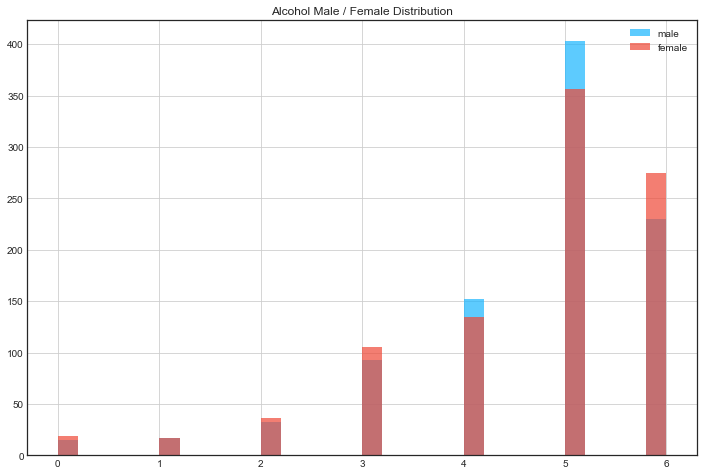

In [91]:
fig= plt.figure(figsize=(12,8))
plt.title("Alcohol Male / Female Distribution")
m_Alcohol.hist(alpha = 0.7, bins = 30,label ='male')
f_Alcohol.hist(alpha = 0.7, bins = 30,label='female')
plt.legend(loc = 'upper right')

/Users/DataScience/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


"\n#Energy\nax13 = fig2.add_subplot(336)\nax13.set_xlabel('Energy')\nax13.set_ylabel('Count')\nax13.set_title('Song Energy Like Distribution')\npos_energy.hist(alpha=0.5,bins = 30)\nax14=fig2.add_subplot(336)\nneg_energy.hist(alpha=0.5,bins=30)\n\n#Key\n\nax14 = fig2.add_subplot(337)\nax14.set_xlabel('Key')\nax14.set_ylabel('Count')\nax14.set_title('Song Key Like Distribution')\npos_key.hist(alpha=0.5,bins = 30)\nax15=fig2.add_subplot(337)\nneg_key.hist(alpha=0.5,bins=30)\n\n#Acousticness\nax16 = fig2.add_subplot(338)\nax16.set_xlabel('Acousticness')\nax16.set_ylabel('Count')\nax16.set_title('Song Acousticness Like Distribution')\npos_acousticness.hist(alpha=0.5,bins = 30)\nax17=fig2.add_subplot(338)\nneg_acousticness.hist(alpha=0.5,bins=30)\n\n#Instrumentalness\nax18 = fig2.add_subplot(339)\nax18.set_xlabel('Instrumentalness')\nax18.set_ylabel('Count')\nax18.set_title('Song Instrumentalness Like Distribution')\npos_instrumentalness.hist(alpha=0.5,bins = 30)\nax19=fig2.add_subplot(339)

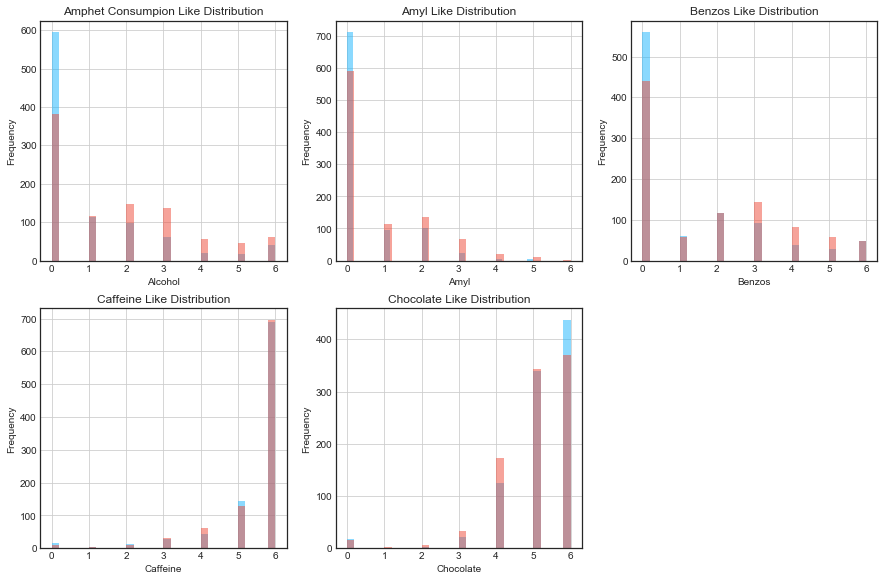

In [92]:
fig2 = plt.figure ( figsize=(15,15))
#Amphet
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Alcohol')
ax3.set_ylabel('Frequency')
ax3.set_title('Amphet Consumpion Like Distribution')
m_Amphet.hist(alpha=0.5,bins = 30)
ax4=fig2.add_subplot(331)
f_Amphet.hist(alpha=0.5,bins=30)

# Amyl
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Amyl')
ax5.set_ylabel('Frequency')
ax5.set_title('Amyl Like Distribution')
m_Amyl.hist(alpha=0.5,bins = 30)
ax6=fig2.add_subplot(332)
f_Amyl.hist(alpha=0.5,bins=30)

#Benzos
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Benzos')
ax7.set_ylabel('Frequency')
ax7.set_title('Benzos Like Distribution')
m_Benzos.hist(alpha=0.5,bins = 30)
ax8=fig2.add_subplot(333)
f_Benzos.hist(alpha=0.5,bins=30)

#Caffeine
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Caffeine')
ax9.set_ylabel('Frequency')
ax9.set_title('Caffeine Like Distribution')
m_Caffeine.hist(alpha=0.5,bins = 30)
ax10=fig2.add_subplot(334)
f_Caffeine.hist(alpha=0.5,bins=30)

#Chocolate
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Chocolate')
ax11.set_ylabel('Frequency')
ax11.set_title('Chocolate Like Distribution')
m_Chocolate.hist(alpha=0.5,bins = 30)
ax12=fig2.add_subplot(335)
f_Chocolate.hist(alpha=0.5,bins=30)

"""
#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha=0.5,bins = 30)
ax14=fig2.add_subplot(336)
neg_energy.hist(alpha=0.5,bins=30)

#Key

ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Key')
ax14.set_ylabel('Count')
ax14.set_title('Song Key Like Distribution')
pos_key.hist(alpha=0.5,bins = 30)
ax15=fig2.add_subplot(337)
neg_key.hist(alpha=0.5,bins=30)

#Acousticness
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha=0.5,bins = 30)
ax17=fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5,bins=30)

#Instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentalness')
ax18.set_ylabel('Count')
ax18.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha=0.5,bins = 30)
ax19=fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5,bins=30)
"""


In [327]:
# features = ["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]
df = pd.DataFrame(data)
#features = df.columns.difference(['ID', 'Age','Unnamed: 0'])
features = df.columns[1:13]
features

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'],
      dtype='object')

In [335]:
model = DecisionTreeClassifier(min_samples_split=10,criterion="entropy")

In [336]:
x_train = train[features]
y_train = train["Ecstasy"]
x_test = train[features]
y_test = train["Ecstasy"]


In [337]:
dt = model.fit(x_train,y_train)

In [338]:
#Graphviz - ensure to build decision tree image

In [339]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

In [340]:
# show_tree(dt,features,'dec_tree_01.png')

In [341]:
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.77215980024968789